In [15]:
# Import useful libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#from wordcloud import WordCloud
from nltk.sentiment.vader import SentimentIntensityAnalyzer


#import the data
df = pd.read_csv('../data/raw_analyst_ratings.csv')


Descriptive Statistics:

In [16]:
df.head()

Unnamed: 0                                           headline  \
0           0            Stocks That Hit 52-Week Highs On Friday   
1           1         Stocks That Hit 52-Week Highs On Wednesday   
2           2                      71 Biggest Movers From Friday   
3           3       46 Stocks Moving In Friday's Mid-Day Session   
4           4  B of A Securities Maintains Neutral on Agilent...   

                                                 url          publisher  \
0  https://www.benzinga.com/news/20/06/16190091/s...  Benzinga Insights   
1  https://www.benzinga.com/news/20/06/16170189/s...  Benzinga Insights   
2  https://www.benzinga.com/news/20/05/16103463/7...         Lisa Levin   
3  https://www.benzinga.com/news/20/05/16095921/4...         Lisa Levin   
4  https://www.benzinga.com/news/20/05/16095304/b...         Vick Meyer   

                        date stock  
0  2020-06-05 10:30:54-04:00     A  
1  2020-06-03 10:45:20-04:00     A  
2  2020-05-26 04:30:07-04:00     A  
3  2020-05-22 12:45:06-04:00     A  
4  2020-05-22 11:38:59-04:00     A

In [18]:
# Descriptive Statistics for Headline Length
df['headline_length'] = df['headline'].apply(len)

# Basic statistics for headline length
headline_stats = df['headline_length'].describe()
print("Basic Statistics for Headline Length:\n", headline_stats)

Basic Statistics for Headline Length:
 count    1.407328e+06
mean     7.312051e+01
std      4.073531e+01
min      3.000000e+00
25%      4.700000e+01
50%      6.400000e+01
75%      8.700000e+01
max      5.120000e+02
Name: headline_length, dtype: float64


the data have maximum of 512 and minimum of 3 characters of headline 

Number of Articles per Publisher

In [20]:
# Count the number of articles per publisher
publisher_count = df['publisher'].value_counts()
print("\nNumber of Articles per Publisher:\n", publisher_count)


Number of Articles per Publisher:
 publisher
Paul Quintaro        228373
Lisa Levin           186979
Benzinga Newsdesk    150484
Charles Gross         96732
Monica Gerson         82380
                      ...  
MoneyGeek                 1
muathe                    1
Robert Morris             1
LeftCoastHedgie           1
Jeremie Capron            1
Name: count, Length: 1034, dtype: int64


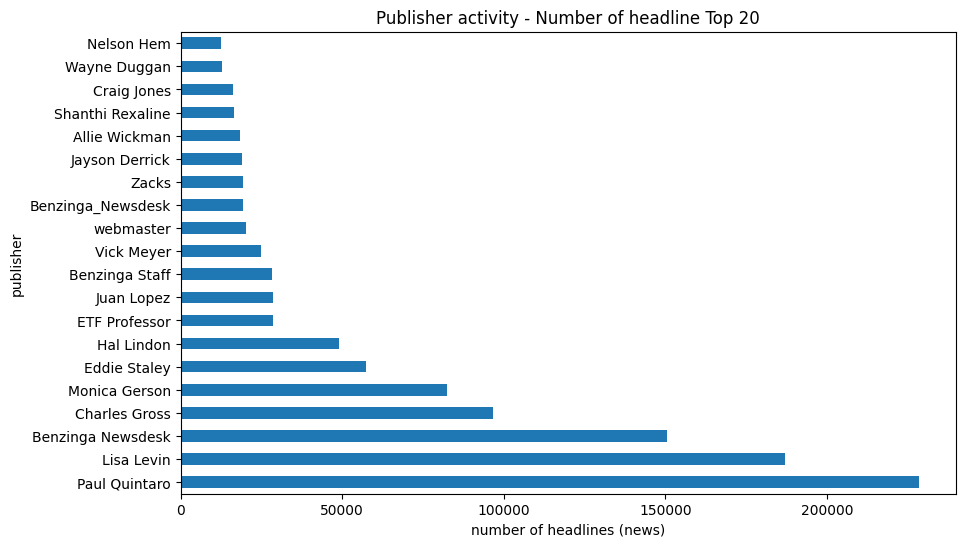

In [22]:
publisher_activity = df.groupby("publisher")["headline"].count()
top_publishers = publisher_activity.sort_values(ascending=False).head(20)

plt.figure(figsize=(10,6))
top_publishers.plot(kind='barh', title="Publisher activity - Number of headline Top 20")
plt.xlabel("number of headlines (news)")
plt.ylabel("publisher")
plt.show()

Analyze the publication dates to see trends over time, such as increased news frequency on particular days or during specific events.

some dates are  inconsistent; use the infer_datetime_format=True while changing in to datatime format

In [27]:
df.loc[:,"date"] = pd.to_datetime(df["date"], format='mixed', utc=True)
df.head()

Unnamed: 0                                           headline  \
0           0            Stocks That Hit 52-Week Highs On Friday   
1           1         Stocks That Hit 52-Week Highs On Wednesday   
2           2                      71 Biggest Movers From Friday   
3           3       46 Stocks Moving In Friday's Mid-Day Session   
4           4  B of A Securities Maintains Neutral on Agilent...   

                                                 url          publisher  \
0  https://www.benzinga.com/news/20/06/16190091/s...  Benzinga Insights   
1  https://www.benzinga.com/news/20/06/16170189/s...  Benzinga Insights   
2  https://www.benzinga.com/news/20/05/16103463/7...         Lisa Levin   
3  https://www.benzinga.com/news/20/05/16095921/4...         Lisa Levin   
4  https://www.benzinga.com/news/20/05/16095304/b...         Vick Meyer   

                       date stock  headline_length  
0 2020-06-05 10:30:54-04:00     A               39  
1 2020-06-03 10:45:20-04:00     A               42  
2 2020-05-26 04:30:07-04:00     A               29  
3 2020-05-22 12:45:06-04:00     A               44  
4 2020-05-22 11:38:59-04:00     A               87

In [29]:
data_stats = df["date"].describe()
data_stats

count                                1407328
mean     2015-08-22 01:44:39.007627520-04:00
min                2009-02-14 00:00:00-04:00
25%                2013-01-16 00:00:00-04:00
50%                2015-09-23 00:00:00-04:00
75%                2018-05-21 00:00:00-04:00
max                2020-06-11 17:12:35-04:00
Name: date, dtype: object

from this we have a the most recent pubication is 2020-06-11 21:12:35+00:00 and the earlist was 2009-02-14 00:00:00+00:00

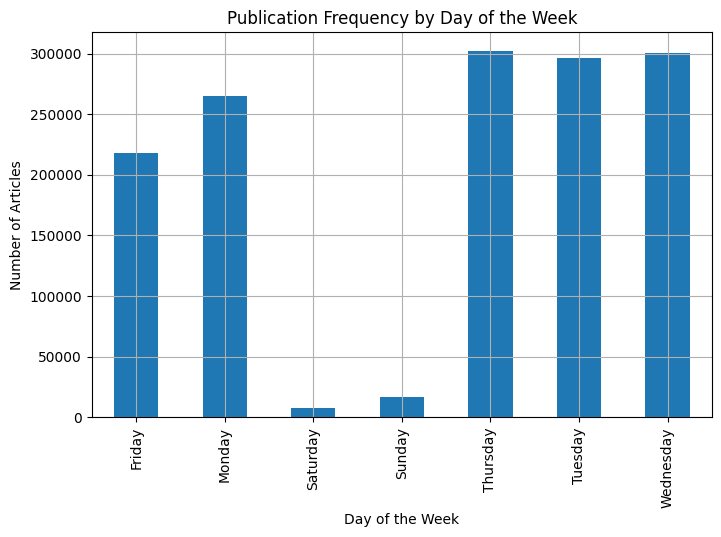

In [35]:
# Analyze publication frequency by day of the week
df['day_of_week'] = df['date'].dt.day_name()
day_of_week_count = df['day_of_week'].value_counts().sort_index()

# Plotting publication frequency by day of the week
plt.figure(figsize=(8, 5))
day_of_week_count.plot(kind='bar')
plt.title("Publication Frequency by Day of the Week")
plt.xlabel("Day of the Week")
plt.ylabel("Number of Articles")
plt.grid(True)
plt.show()